# <b> AUTOMATED COUGH DETECTION</b>

========================================================

# INTRODUCTION

<li> Cough monitoring is useful for people suffering from chronic obstructive pulmonary disease.
<li>  In chronic respiratory diseases, such as asthma and COPD, monitoring of cough is an integral part in treatment of the disease.
<li> Here we are planning to develop an algorithm with the aim of helping health workers for remote monitoring and treatment of patients. 
<li> This will result in a continuous Examination of the condition of the disease, even if there is a deficit of the health workers.

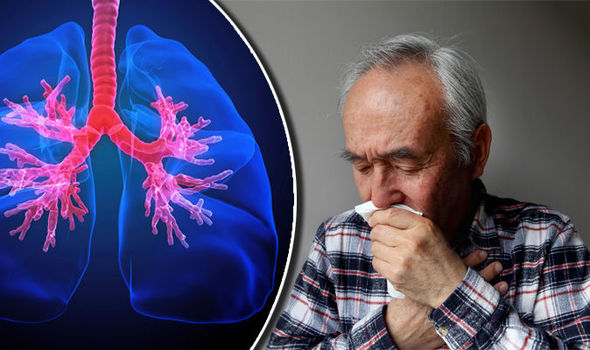

# Proposed Model

###### In order to preprocess the data we have divided them into segments of 8 sec. We pass the audio data through Mel Frequency Cepstral Coefficients (MFCC) to in order to generate 2-Dimensional spectrograms <br>Which we use as input features to our Convolutional Neural Network, Here we have used a Convolutional layer followed by an Average-pooling layer which is then followed by a similar set of Convolution and Average-pool, which then classifies the data into a Noise or Cough.

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import os, sklearn
from sklearn import preprocessing

ModuleNotFoundError: No module named 'librosa'

# visualizing the Audio Data and the processed data

In [21]:
#loading a sample data for the purpose of data-analysis

#sample_file = "cough_audio/cough28.wav"
sample_file = "noise_audio/noise56.wav"      #crackling of a chair
ipd.Audio(sample_file)

## Plotting the Data
### Time Domain

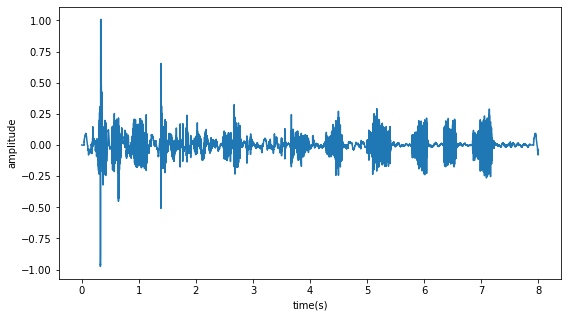

In [3]:
amp_data, samp_freq = librosa.load(sample_file)
a = np.arange(0,8,1/samp_freq)
plt.figure(figsize=(9, 5))
plt.plot(a,amp_data)
plt.xlabel('time(s)');
plt.ylabel('amplitude');

### Frequency Domain 

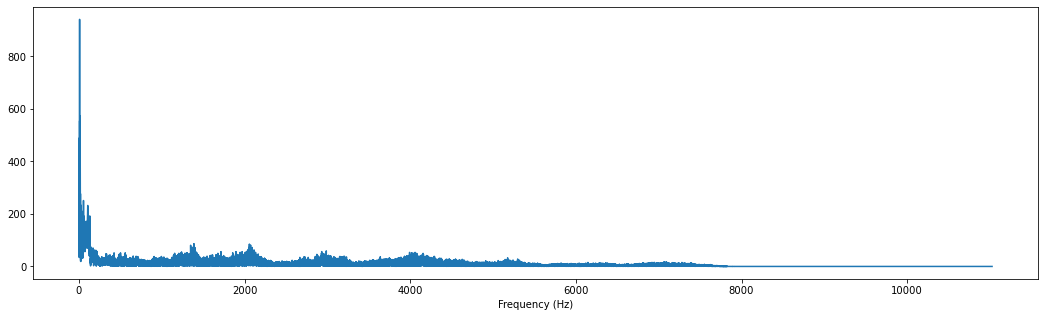

In [4]:
    X = np.fft.fft(amp_data) #applying fourier transform
    X_mag = np.absolute(X) #taking only the magnitude and neglecting the phase 
    plt.figure(figsize=(18, 5))
    f = np.linspace(0, samp_freq, len(X_mag))
    f_bins = int(len(X_mag)*0.5)  # we display frequencies only till nquist frequency i.e.  sampling_freq/2
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)');

## Generating Spectrogram

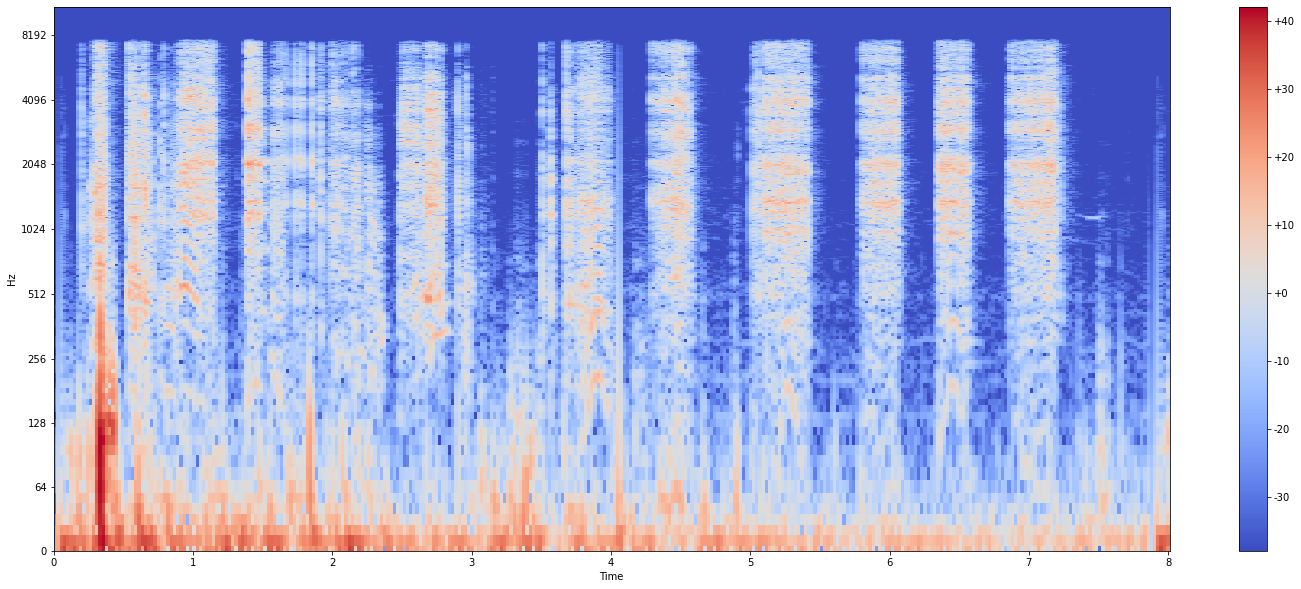

In [5]:
FRAME_SIZE = 2048
HOP_SIZE = 512
stft = librosa.stft(amp_data, n_fft=FRAME_SIZE, hop_length=HOP_SIZE) #Extract STFT
y = librosa.power_to_db(np.abs(stft) ** 2) #Convert amplitude to Db
plt.figure(figsize=(25, 10))
librosa.display.specshow(y, sr=samp_freq, hop_length=HOP_SIZE, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.f");

## Extracting Mel Spectrogram 
#### The frequency is now represented in mels 

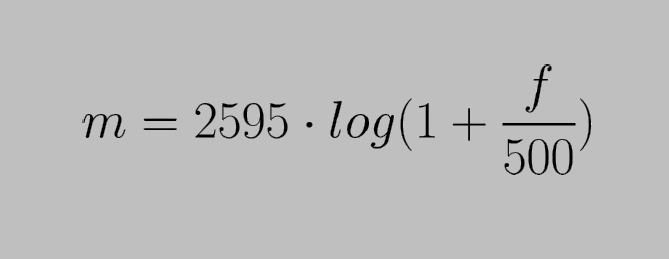

### Filter banks

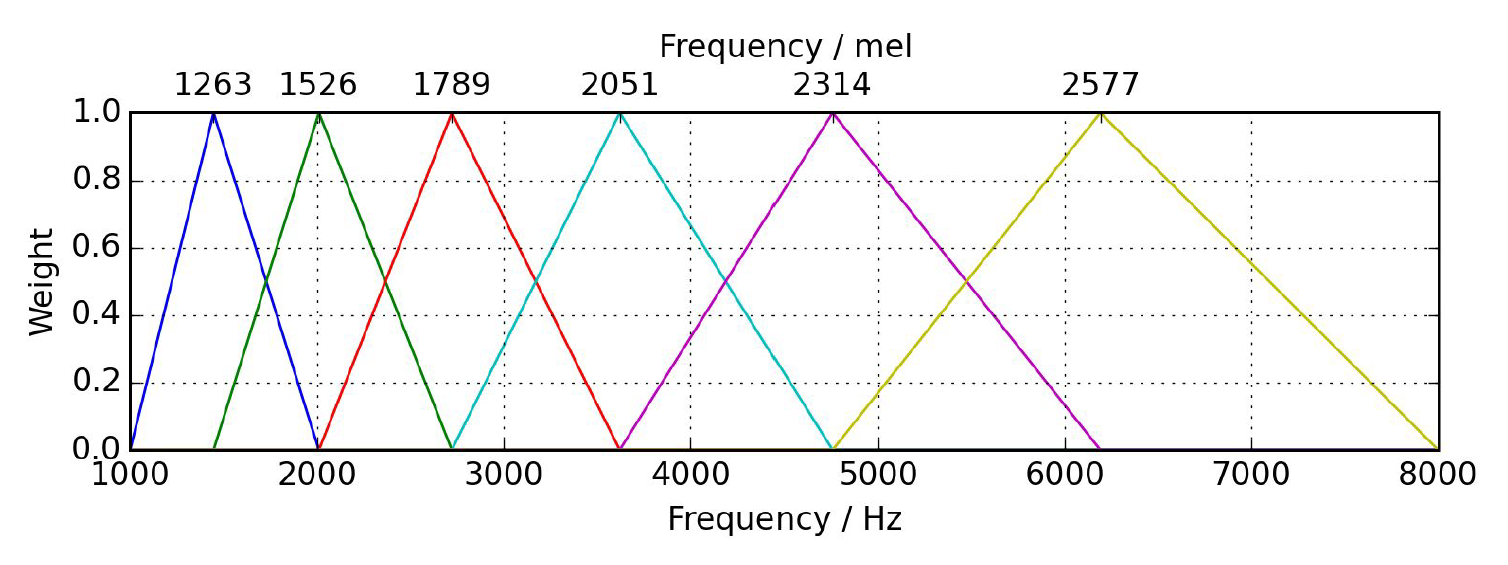

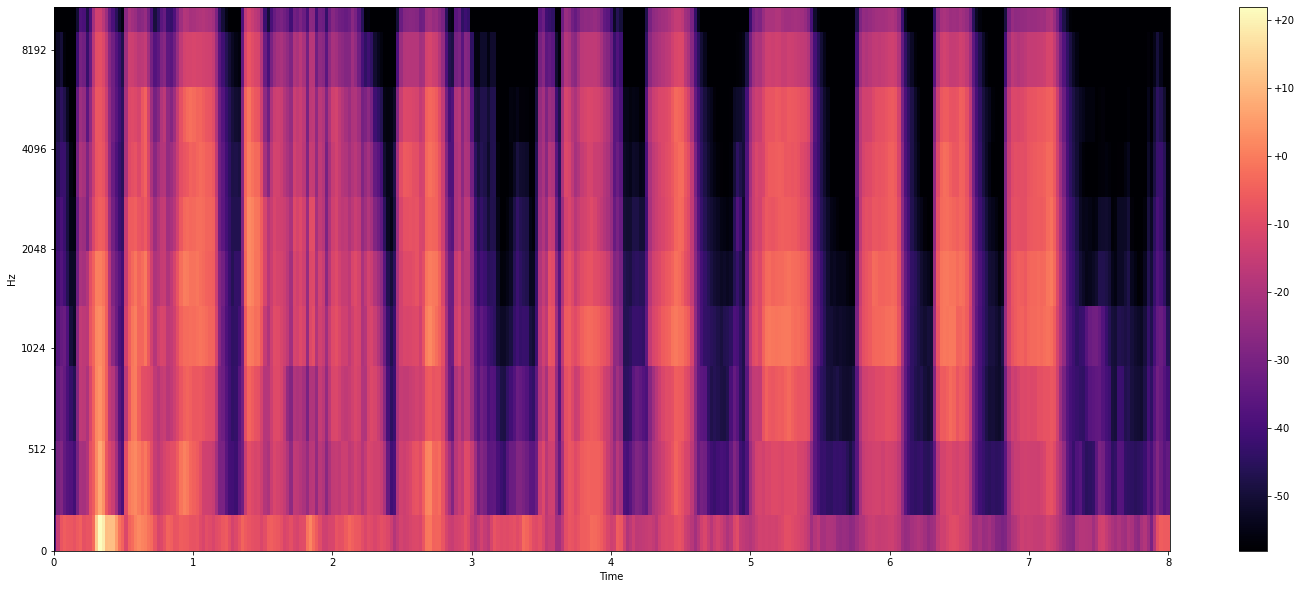

In [6]:
filter_banks = librosa.filters.mel(n_fft=2048, sr= samp_freq, n_mels=90)
mel_spectrogram = librosa.feature.melspectrogram(amp_data, sr=samp_freq, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, x_axis="time",y_axis="mel", sr=samp_freq)
plt.colorbar(format="%+2.f")
plt.show()

## Extracting MFCC

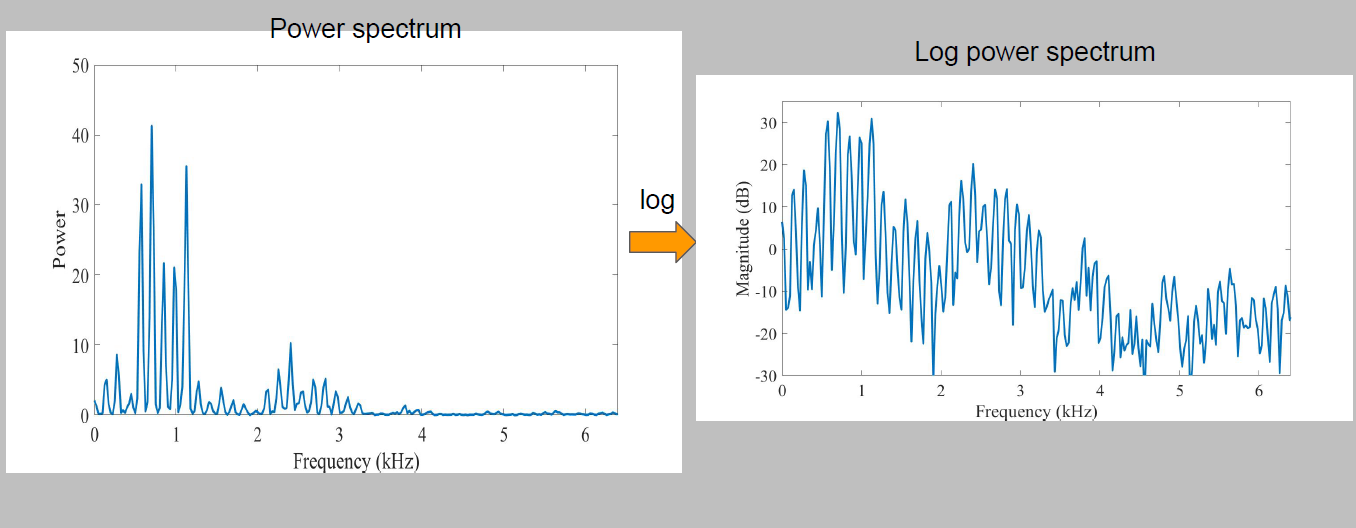

### Now we want to take the spectrum of the log power spectrum

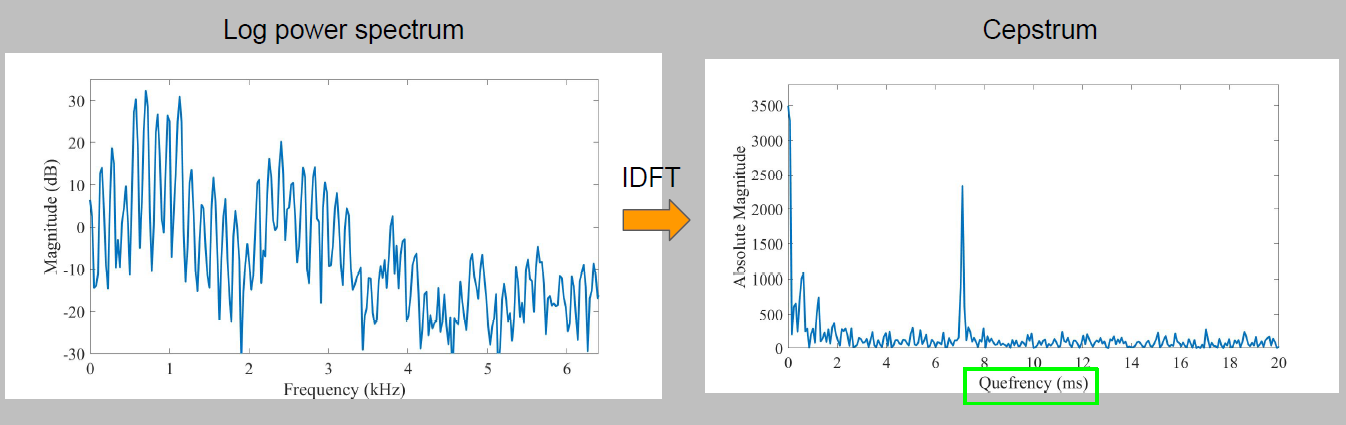



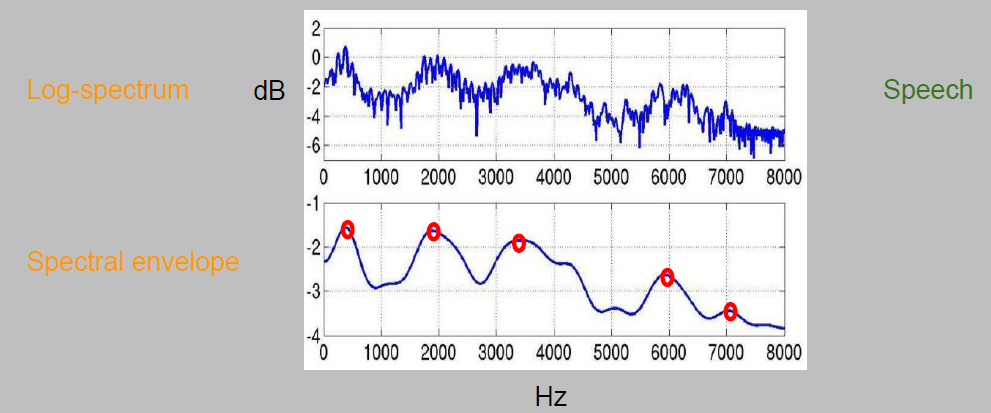

#### Final Formula
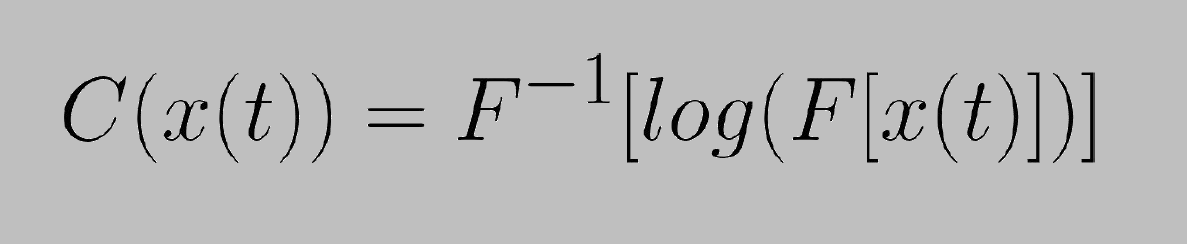

(13, 102)


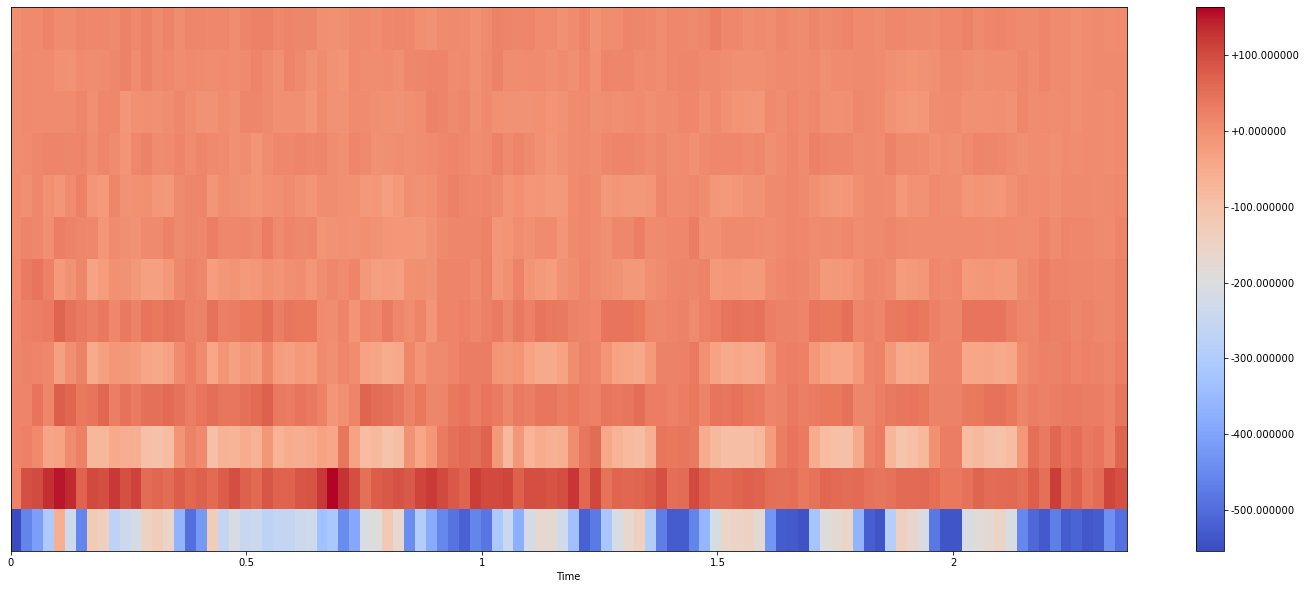

In [7]:
frame_size = 2048
MFCC = librosa.feature.mfcc(amp_data, n_mfcc = 13, sr = samp_freq, n_fft = frame_size, hop_length = int((len(amp_data)-frame_size)/100))
print(MFCC.shape) #this is the matrix of interest

#plotting the processed features
plt.figure(figsize = (25, 10))
librosa.display.specshow(MFCC, x_axis = "time", sr = samp_freq)
plt.colorbar(format = "%+2f")
plt.show()

# Classification of Data

## Loading Dataset 

In [8]:
#for loading the data into X and adding the labels into Y
#in this block we are loading the audio samples of cough

audio_file = "cough_audio/cough380.wav"
signal, sr = librosa.load(audio_file)
frame_size = 2048
n_mfcc = 13
mfcc = librosa.feature.mfcc(signal, n_mfcc = n_mfcc, sr = sr, n_fft = frame_size, hop_length = int((len(signal)-frame_size)/100))

X = np.array([])
X = np.append([], mfcc)
audio_file = "cough_audio/cough379.wav"
signal, sr = librosa.load(audio_file)
frame_size = 2048
mfcc = librosa.feature.mfcc(signal, n_mfcc = n_mfcc, sr = sr, n_fft = frame_size, hop_length = int((len(signal)-frame_size)/100))

C = np.array([])
C = np.append([], mfcc)
X = np.append([X], [C], axis = 0)

for i in range(379):
    audio_file = "cough_audio/cough"+str(i)+".wav"
    if os.path.isfile(audio_file):
        signal, sr = librosa.load(audio_file)
        frame_size = 2048
        mfcc = librosa.feature.mfcc(signal, n_mfcc = n_mfcc, sr = sr, n_fft = frame_size, hop_length = int((len(signal)-frame_size)/100))
        C = np.array([])
        C = np.append([], mfcc)
        X = np.append(X, [C], axis = 0)
        print(X.shape)

(3, 1326)
(4, 1326)
(5, 1326)
(6, 1326)
(7, 1326)
(8, 1326)
(9, 1326)
(10, 1326)
(11, 1326)
(12, 1326)
(13, 1326)
(14, 1326)
(15, 1326)
(16, 1326)
(17, 1326)
(18, 1326)
(19, 1326)
(20, 1326)
(21, 1326)
(22, 1326)
(23, 1326)
(24, 1326)
(25, 1326)
(26, 1326)
(27, 1326)
(28, 1326)
(29, 1326)
(30, 1326)
(31, 1326)
(32, 1326)
(33, 1326)
(34, 1326)
(35, 1326)
(36, 1326)
(37, 1326)
(38, 1326)
(39, 1326)
(40, 1326)
(41, 1326)
(42, 1326)
(43, 1326)
(44, 1326)
(45, 1326)
(46, 1326)
(47, 1326)
(48, 1326)
(49, 1326)
(50, 1326)
(51, 1326)
(52, 1326)
(53, 1326)
(54, 1326)
(55, 1326)
(56, 1326)
(57, 1326)
(58, 1326)
(59, 1326)
(60, 1326)
(61, 1326)
(62, 1326)
(63, 1326)
(64, 1326)
(65, 1326)
(66, 1326)
(67, 1326)
(68, 1326)
(69, 1326)
(70, 1326)
(71, 1326)
(72, 1326)
(73, 1326)
(74, 1326)
(75, 1326)
(76, 1326)
(77, 1326)
(78, 1326)
(79, 1326)
(80, 1326)
(81, 1326)
(82, 1326)
(83, 1326)
(84, 1326)
(85, 1326)
(86, 1326)
(87, 1326)
(88, 1326)
(89, 1326)
(90, 1326)
(91, 1326)
(92, 1326)
(93, 1326)
(94, 1

In [14]:
Y = np.ones((X.shape[0], 1))
Y.shape

(751, 1)

In [15]:
#in this block we are further appending the audio samples of noise and adding their labels

for i in range(424):
    audio_file = "noise_audio/noise"+str(i)+".wav"
    if os.path.isfile(audio_file):
        signal, sr = librosa.load(audio_file)
        frame_size = 2048
        mfcc = librosa.feature.mfcc(signal, n_mfcc = n_mfcc, sr = sr, n_fft = frame_size, hop_length = int((len(signal)-frame_size)/100))
        #mfcc = preprocessing.normalize(mfcc)
        C = np.array([])
        C = np.append([], mfcc)
        X = np.append(X, [C], axis = 0)
        Y = np.append(Y, [[0]], axis = 0)
        print(X.shape, Y.shape)

(752, 1326) (752, 1)
(753, 1326) (753, 1)
(754, 1326) (754, 1)
(755, 1326) (755, 1)
(756, 1326) (756, 1)
(757, 1326) (757, 1)
(758, 1326) (758, 1)
(759, 1326) (759, 1)
(760, 1326) (760, 1)
(761, 1326) (761, 1)
(762, 1326) (762, 1)
(763, 1326) (763, 1)
(764, 1326) (764, 1)
(765, 1326) (765, 1)
(766, 1326) (766, 1)
(767, 1326) (767, 1)
(768, 1326) (768, 1)
(769, 1326) (769, 1)
(770, 1326) (770, 1)
(771, 1326) (771, 1)
(772, 1326) (772, 1)
(773, 1326) (773, 1)
(774, 1326) (774, 1)
(775, 1326) (775, 1)
(776, 1326) (776, 1)
(777, 1326) (777, 1)
(778, 1326) (778, 1)
(779, 1326) (779, 1)
(780, 1326) (780, 1)
(781, 1326) (781, 1)
(782, 1326) (782, 1)
(783, 1326) (783, 1)
(784, 1326) (784, 1)
(785, 1326) (785, 1)
(786, 1326) (786, 1)
(787, 1326) (787, 1)
(788, 1326) (788, 1)
(789, 1326) (789, 1)
(790, 1326) (790, 1)
(791, 1326) (791, 1)
(792, 1326) (792, 1)
(793, 1326) (793, 1)
(794, 1326) (794, 1)
(795, 1326) (795, 1)
(796, 1326) (796, 1)
(797, 1326) (797, 1)
(798, 1326) (798, 1)
(799, 1326) (

(1130, 1326) (1130, 1)
(1131, 1326) (1131, 1)
(1132, 1326) (1132, 1)
(1133, 1326) (1133, 1)
(1134, 1326) (1134, 1)
(1135, 1326) (1135, 1)
(1136, 1326) (1136, 1)
(1137, 1326) (1137, 1)
(1138, 1326) (1138, 1)
(1139, 1326) (1139, 1)
(1140, 1326) (1140, 1)
(1141, 1326) (1141, 1)
(1142, 1326) (1142, 1)
(1143, 1326) (1143, 1)
(1144, 1326) (1144, 1)
(1145, 1326) (1145, 1)
(1146, 1326) (1146, 1)
(1147, 1326) (1147, 1)
(1148, 1326) (1148, 1)
(1149, 1326) (1149, 1)
(1150, 1326) (1150, 1)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#splitting the Data into train and test data with random shuffling

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42, shuffle = True)
classes = 1

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten, Reshape, BatchNormalization, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.callbacks import TensorBoard
import time
import datetime

# NEURAL NETWORK

In [19]:
#THIS IS BASICALLY OUR NEURAL NETWORK PART
# We have used the early commented part to produce all the possible curves to analyze which network best suits the task
# which we are performing


# for act_fn in ["sigmoid", "relu", "linear"]:
#     for i, lr in enumerate([0.001, 0.003, 0.006, 0.01]):
#         log_dir = "logs/fit/Adam" + act_fn + "_lr_" + str(i)
#         tensorboard = tf.keras.callbacks.TensorBoard(log_dir= log_dir, histogram_freq=1)
log_dir = "logs/fit/single1"
tensorboard = tf.keras.callbacks.TensorBoard(log_dir= log_dir, histogram_freq=1)
 
    # model architecture
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], 1), name='x_input'))
model.add(Reshape((int(X_train.shape[1] / n_mfcc), n_mfcc, 1), input_shape=(X_train.shape[1], )))
        
model.add(Conv2D(10, kernel_size=5, activation= "relu", padding='same', kernel_constraint=MaxNorm(3)))
        
model.add(AveragePooling2D(pool_size=2, padding='same'))
        
model.add(Conv2D(5, kernel_size=5, activation= "relu", padding='same', kernel_constraint=MaxNorm(3)))
        
model.add(AveragePooling2D(pool_size=2, padding='same'))
        
model.add(Flatten())
        
model.add(Dense(classes, activation='sigmoid', name='y_pred', kernel_constraint=MaxNorm(3)))

# this controls the learning rate
opt = Adam(learning_rate=0.003)
# train the neural network
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=8, validation_data=(X_test, Y_test), callbacks = [tensorboard]) #, verbose = 2
print("end of a session")

Epoch 1/8
 1/25 [>.............................] - ETA: 0s - loss: 2.0516 - accuracy: 0.4688WARNING:tensorflow:From C:\Users\dixit\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
25/25 [==============================] - 4s 143ms/step - loss: 1.0372 - accuracy: 0.6052 - val_loss: 0.5669 - val_accuracy: 0.6500
Epoch 2/8
25/25 [==============================] - 1s 47ms/step - loss: 0.5732 - accuracy: 0.6429 - val_loss: 0.5428 - val_accuracy: 0.6526
Epoch 3/8
25/25 [==============================] - 1s 39ms/step - loss: 0.5691 - accuracy: 0.6442 - val_loss: 0.5430 - val_accuracy: 0.6421
Epoch 4/8
25/25 [==============================] - 1s 40ms/step - loss: 0.5561 - accuracy: 0.6649 - val_loss: 0.5361 - val_accuracy: 0.6395
Epoch 5/8
25/25 [==============================] - 1s 39ms/step - loss: 0.5

In [20]:
# we are using tensor board to plot and analyse the data in the rtrain and validation of the data

%reload_ext tensorboard
%tensorboard --logdir logs/fit

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 8892.

In [262]:
#predicting the values using the trained model

Y_pred = model.predict(X_test)
Y_pred = Y_pred.round()

In [263]:
#checking confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, accuracy_score

confusion_matrix(Y_test, Y_pred)

array([[123,   4],
       [  8, 113]], dtype=int64)

In [255]:
# here we check the f1 score

print(f1_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), accuracy_score(Y_test, Y_pred))

0.9495798319327732 0.9658119658119658 0.9516129032258065


In [257]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_21 (Reshape)         (None, 102, 13, 1)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 102, 13, 10)       260       
_________________________________________________________________
average_pooling2d_42 (Averag (None, 51, 7, 10)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 51, 7, 5)          1255      
_________________________________________________________________
average_pooling2d_43 (Averag (None, 26, 4, 5)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 520)               0         
_________________________________________________________________
y_pred (Dense)               (None, 1)               

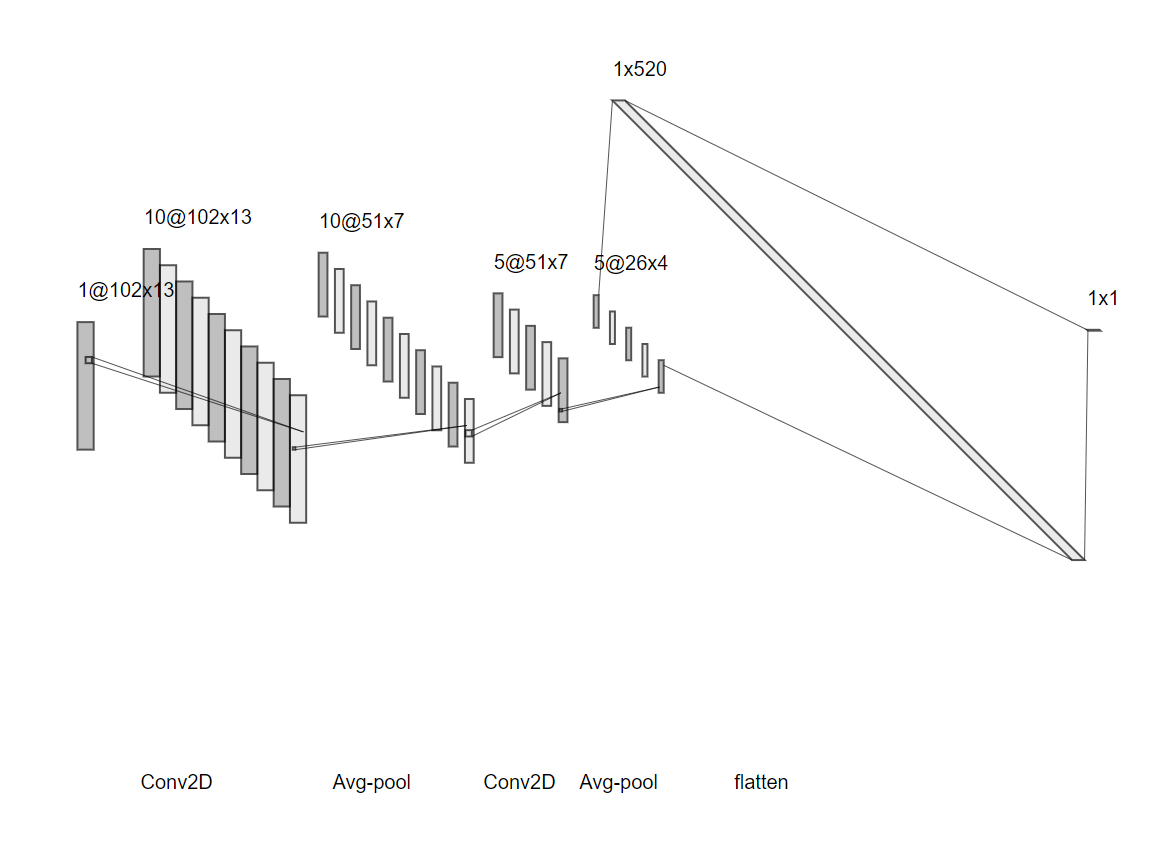

In [260]:
#checking the training through simple multi-layer-perceptron

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)
clf.score(X_test, Y_test)

C:\Users\dixit\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9556451612903226

# Predicting for a random data

In [169]:
y, fs = librosa.load("noise_audio/noise2.wav")
ipd.Audio("noise_audio/noise2.wav")

In [170]:
 mfcc = librosa.feature.mfcc(y, n_mfcc = n_mfcc, sr = fs, n_fft = frame_size, hop_length = int((len(signal)-frame_size)/100))

In [171]:
vector = np.array([np.append([],[mfcc])])

In [172]:
vector.shape

(1, 1326)

In [173]:
op = model.predict(vector)

In [188]:
print(op.round(), op)

[[0.]] [[0.45371127]]


# References

<li> file:///C:/Users/dixit/Downloads/Mel%20Spectrograms%20Explained%20Easily.htm
<li> https://github.com/musikalkemist/AudioSignalProcessingForML/blob/master/19-%20MFCCs%20Explained%20Easily/Mel-Frequency%20Cepstral%20Coefficients%20Explained%20Easily.pdf
<li> https://github.com/tensorflow/tensorflow/blob/v2.4.1/tensorflow/python/keras/callbacks.py#L2107-L2125
<li> https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8268175&tag=1
<li> https://spiral.imperial.ac.uk/bitstream/10044/1/79724/2/Automatic_Cough_Detection_in_Acoustic_Signal_using_Spectral_Features___EMBC_2019.pdf
<li> https://create.arduino.cc/projecthub/edge-impulse/cough-detection-with-tinyml-on-arduino-417f37